# Importing Libraries for Cleaning the Data

In [2]:
# numpy is useful for making arrays and handling numerical data
# pandas is used to create the dataframe
# matplotlib.pyplot is used for plotting graphs and charts
# yfinance is used to extract historical market data from Yahoo Finance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Data Collection and Processing

In [4]:
# get the last 10 years of data
start = '2013-01-01'
end = '2023-12-31'
# stocks of google company
stock = 'GOOG'
# download stock data
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# displaying the downloaded dataset
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,28.322241,28.322241,27.570307,27.846546,27.814894,262719
2014-03-28,27.983171,28.243956,27.857019,27.922838,27.891100,824257
2014-03-31,28.266893,28.272379,27.770258,27.772251,27.740683,216593
2014-04-01,27.859013,28.344681,27.859013,28.280355,28.248211,158434
2014-04-02,29.917362,30.158699,28.032537,28.272379,28.240242,2942055
...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.557770,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.657669,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.279236,17288400


In [6]:
# setting index for the dataset
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-27,28.322241,28.322241,27.570307,27.846546,27.814894,262719
1,2014-03-28,27.983171,28.243956,27.857019,27.922838,27.891100,824257
2,2014-03-31,28.266893,28.272379,27.770258,27.772251,27.740683,216593
3,2014-04-01,27.859013,28.344681,27.859013,28.280355,28.248211,158434
4,2014-04-02,29.917362,30.158699,28.032537,28.272379,28.240242,2942055
...,...,...,...,...,...,...,...
2453,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.557770,18494700
2454,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.657669,11170100
2455,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.279236,17288400
2456,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.119415,12192500


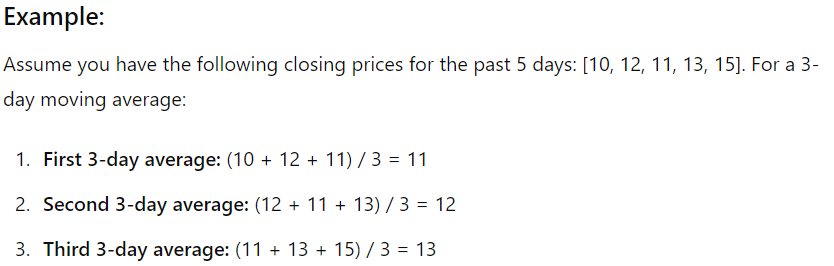

In [8]:
# to understand the general trend of a stock's price
# compute moving average for the last 100 days
# done by a series of averages of different subsets of the full data set
ma_100_days = data.Close.rolling(100).mean()

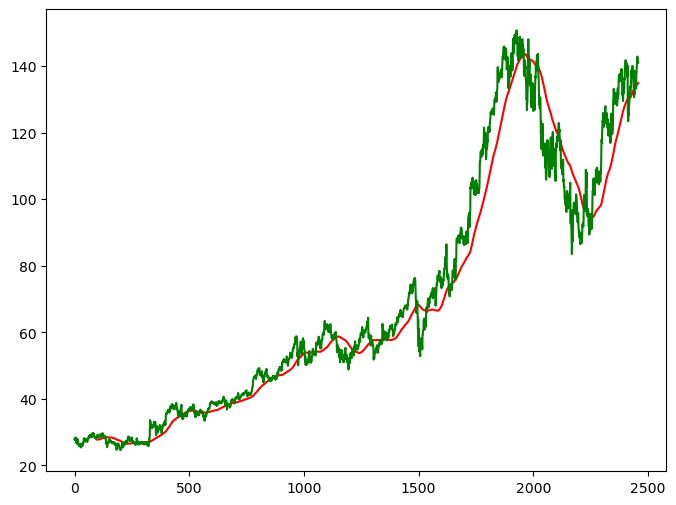

In [9]:
# the figure size to 8 inches by 6 inches
# plots the 100-day moving average on the graph with a red line
# plots the actual closing prices of the stock on the same graph with a green line
# plot this data on a graph and display it
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
# compute moving average for the last 200 days
ma_200_days = data.Close.rolling(200).mean()

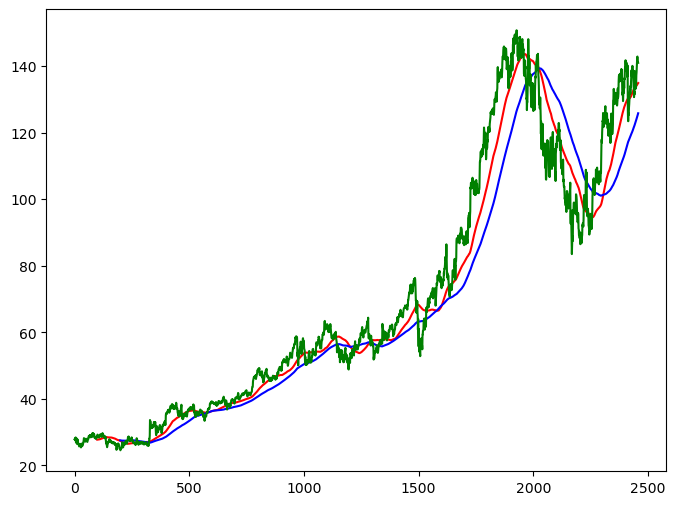

In [11]:
# the figure size to 8 inches by 6 inches
# plots the 100-day moving average on the graph with a red line
# plots the 200-day moving average on the graph with a blue line
# plots the actual closing prices of the stock on the same graph with a green line
# plot this data on a graph and display it
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
# drop any null values or missing values
data.dropna(inplace=True)

# Creation of Model

In [14]:
# split the dataset into traing and testing data
# 80% is used as training dataset and the rest 20% as testing dataset
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [15]:
# check the number of rows used for training
data_train.shape[0]

1966

In [16]:
# check the number of rows used for testing
data_test.shape[0]

492

In [17]:
# transforms the data such that all the features are scaled to the specified range
# which is [0, 1] in this case
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
# scale the training data
data_train_scale = scaler.fit_transform(data_train)

In [19]:
# array slicing of the training dataset
# take first 100 data to calculate stocks of the 101th day
# higher the number of data, higher is the accuracy

# store the input sequences (x) and the corresponding target values (y)
# loop iterates over the range from 100 to the number of rows in data_train_scale
# data_train_scale.shape[0] gives the total number of rows in data_train_scale
# for each iteration i, it takes the slice of data from i-100 to i (not inclusive of i) and appends it to the list x.
# for each iteration i, it takes the value at the current position i in the first column (0 index) of data_train_scale
# and appends it to the list y
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [20]:
# convert x and y to arrays
x, y = np.array(x), np.array(y)

In [21]:
# keras is a high-level neural networks API
# 'Input' layer defines the shape and dtype of the input data
# 'Dense' layer is a regular fully connected neural network layer, receives input from all neurons of the previous layer
# 'Dropout' is a regularization technique to prevent overfitting by setting random fraction of input units to 0
# 'LSTM' is a type of recurrent neural network (RNN) that is capable of learning long-term dependencies
# LSTM particularly useful for time series prediction
# 'Sequential' model is a linear stack of layers
from keras.layers import Input, Dense, Dropout, LSTM
from keras.models import Sequential

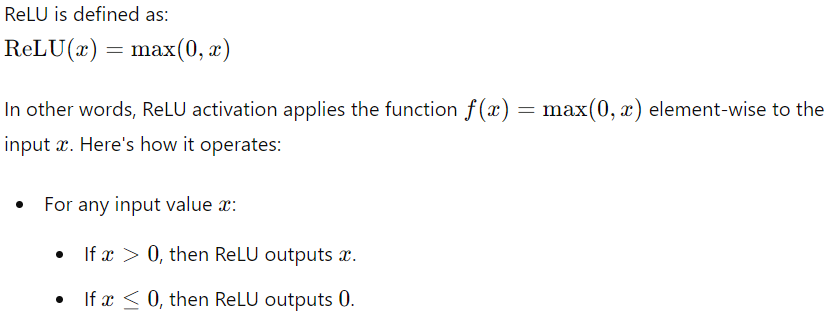

In [23]:
# initializing the sequential model
# allows to build a neural network layer by layer in a linear stack
model = Sequential()

#'shape=(x.shape[1], 1)' indicates that the input will have a sequence length of x.shape[1] (number of time steps) 
# and one feature per time step
model.add(Input(shape=(x.shape[1], 1)))

# creating four layers for the 'LSTM' model
# first layer has 50 neurons
# ReLU - Rectified Linear Unit, is an activation function used in neural networks and deep learning models
# 'return_sequences=True' means that output of this layer will become the input to the next layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
# 20% of the neurons will be randomly set to zero during each training step, which helps prevent overfitting
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# adds a Dense (fully connected) layer with 1 unit
model.add(Dense(units=1))

In [24]:
# compile the model
# adam - Adaptive Moment Estimation, adapts the learning rate
# MSE is a common loss function for regression problems
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# fitting the model
# 'epochs=50' means the training data will be pushed 50 times from the strat of the network to the end
# each time 32 rows will be considered
# verbose prints the data
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 38s 373ms/step - loss: 0.0518
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - loss: 0.0062
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 320ms/step - loss: 0.0062
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 386ms/step - loss: 0.0047
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 20s 346ms/step - loss: 0.0042
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 21s 360ms/step - loss: 0.0041
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 26s 435ms/step - loss: 0.0040
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 26s 431ms/step - loss: 0.0041
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 27s 451ms/step - loss: 0.0042
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 24s 407ms/step - loss: 0.0040
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 28s 486ms/step - loss: 0.0036
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 24s 404ms/step - loss: 0.0033
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 389ms/step - loss: 0.0028
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 20s 339ms/step - loss: 0.0045
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 29s 

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

# Testing the Model

In [28]:
# consider the last 100 days of the dataset
past_100_days = data_train.tail(100)

In [29]:
# add this to test data
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [30]:
data_test

,Close
0,142.398499
1,142.949997
2,142.123001
3,144.550507
4,145.469498
...,...
587,142.720001
588,142.820007
589,141.440002
590,141.279999


In [31]:
# fit the test data
data_test_scale = scaler.fit_transform(data_test)

In [32]:
# array slicing of the test dataset
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [33]:
# convert x and y to arrays
x, y = np.array(x), np.array(y)

In [34]:
# predict
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step


In [35]:
# find value that had been used to divide the input dataset and has been converted to 0 and 1
scale = 1/scaler.scale_

In [36]:
# predicted values
y_predict = y_predict * scale

In [37]:
# actual values
y = y*scale

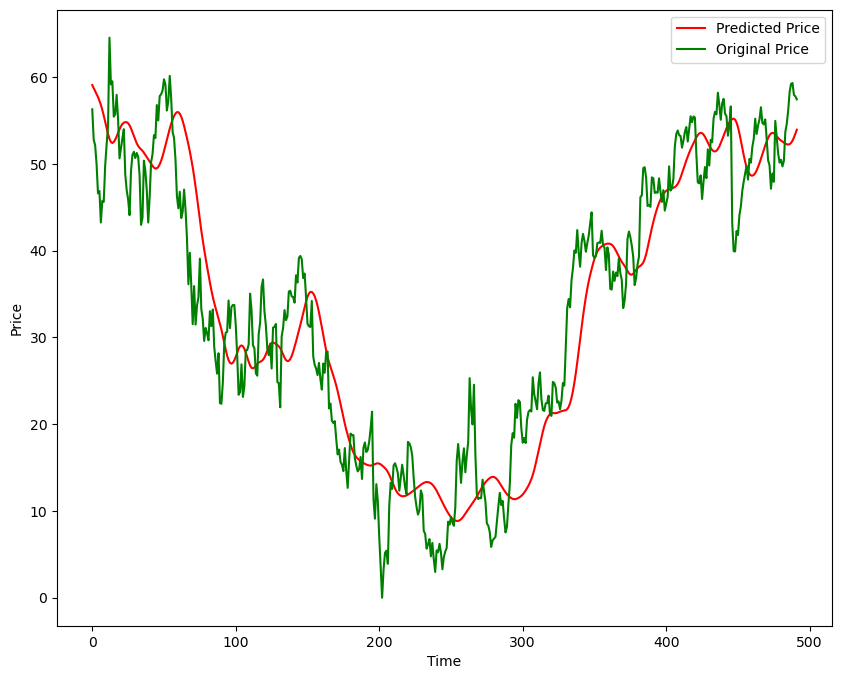

In [38]:
# checking how well the model made predictions
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Saving the Trained Model

In [40]:
model.save('Stock_Price_Prediction_Model.keras')